## ZOMATO RESTAURANT PREDICTION 

In [9]:
## read-manipulate this data
## real world - raw data -> (csv, databases, big)

## read this data --> raw data --> data cleaning --> data analysis --> feature engineering --> ML model
## 100 features, rest -- sucess/not

# !pip install gdown

In [10]:
# !pip install wget

### Using wget/gdown to download CSV file from Google Drive

In [11]:
# import pandas as pd
# ! python -m wget 'https://drive.google.com/uc?id=1_ypP97mHGrLccvDKXDMliV7qaKUDvJnX'

In [12]:
!gdown 'https://drive.google.com/uc?id=1_ypP97mHGrLccvDKXDMliV7qaKUDvJnX'

Downloading...
From: https://drive.google.com/uc?id=1_ypP97mHGrLccvDKXDMliV7qaKUDvJnX
To: /Users/nathalia/Personal/code-practice/Data Science Projects/Predict Success of a Zomato Restaurant /zomato.csv
100%|████████████████████████████████████████| 574M/574M [00:52<00:00, 10.9MB/s]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

In [14]:
import os
working_dir = os.getcwd()
print(working_dir)

/Users/nathalia/Personal/code-practice/Data Science Projects/Predict Success of a Zomato Restaurant 


In [15]:
data_path = working_dir + '/zomato.csv'

### Turn data from CSV file into a DataFrame

In [16]:
df= read_csv(data_path)

# Results
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (51717, 17)


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

### Explore data

In [17]:
df.columns
# headers = np.array(df.columns)
# print(headers)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### Getting all NAN features

In [18]:
# Look how much null data there are in each column
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [19]:
# Return column name that has null data
# list comprehension
[feature for feature in df.columns if df[feature].isnull().sum()>1]
    

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [20]:
# For-loop
feature_na=[]
for feature in df.columns:
    if df[feature].isnull().sum()>1:
        feature_na.append(feature)
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [21]:
# Get the percentage that represents null data in every column
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [22]:
# Get data type for every column data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Perform Data Cleaning on Approx_cost feature

In [23]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [24]:
df[df['approx_cost(for two people)'].isnull()]

url  \
1662   https://www.zomato.com/bangalore/papa-khan-ras...   
1768   https://www.zomato.com/bangalore/innate-jp-nag...   
1795   https://www.zomato.com/bangalore/super-chefs-b...   
3069   https://www.zomato.com/bangalore/super-chefs-b...   
3774   https://www.zomato.com/bangalore/the-hub-ibis-...   
...                                                  ...   
50940  https://www.zomato.com/bangalore/cinnabon-whit...   
51233  https://www.zomato.com/bangalore/mayas-kitchen...   
51247  https://www.zomato.com/bangalore/mast-kalandar...   
51271  https://www.zomato.com/bangalore/karavalli-foo...   
51641  https://www.zomato.com/bangalore/andhra-spices...   

                                                 address  \
1662   6, Abbiah Layout KC Halli Main Road, Bommanaha...   
1768   45, 14th Main, 7th phase, Puttehahalli Palya, ...   
1795   8/3, Opposite Suryadhoya Convention hall, Bann...   
3069   8/3, Opposite Suryadhoya Convention hall, Bann...   
3774   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
...                                                  ...   
50940  Ground Floor, The Forum Neighborhood Mall, Pre...   
51233  43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...   
51247  D64, 33, 1st Floor, Sundari Armadale, Next To ...   
51271  N254-107, 1st Main Road, Near ITPL Gate 3, KIA...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   

                                 name online_order book_table    rate  votes  \
1662                  Papa Khan Rasoi           No         No     NaN      0   
1768                           Innate           No         No     NaN      0   
1795   Super Chef's (New Royal treat)           No         No     NaN      0   
3069   Super Chef's (New Royal treat)           No         No       -      0   
3774         The Hub - Ibis Bengaluru           No         No   3.9/5    237   
...                               ...          ...        ...     ...    ...   
50940                        Cinnabon           No         No  4.0 /5     80   
51233                   Mayas kitchen           No         No     NaN      0   
51247                   Mast Kalandar           No         No  2.6 /5     76   
51271            Karavalli Food Court           No         No  3.2 /5      4   
51641                   Andhra Spices           No         No  3.2 /5      4   

      phone           location      rest_type  \
1662    NaN                NaN            NaN   
1768    NaN           JP Nagar       Delivery   
1795    NaN  Bannerghatta Road    Quick Bites   
3069    NaN  Bannerghatta Road    Quick Bites   
3774    NaN       Marathahalli            Bar   
...     ...                ...            ...   
50940   NaN         Whitefield    Quick Bites   
51233   NaN         Whitefield  Casual Dining   
51247   NaN         Whitefield  Casual Dining   
51271   NaN         Whitefield  Casual Dining   
51641   NaN        Brookefield    Quick Bites   

                                              dish_liked  \
1662                                                 NaN   
1768                                                 NaN   
1795                                                 NaN   
3069                                                 NaN   
3774   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
...                                                  ...   
50940                 Rolls, Cinnamon Roll, Cinnamon Bun   
51233                                                NaN   
51247  Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...   
51271                                                NaN   
51641                                                NaN   

                                  cuisines approx_cost(for two people)  \
1662                                   NaN                         NaN   
1768                             Beverages                         NaN   
1795   North Indian, Chinese, South Indian                         NaN   
3069   North Indian, Chinese, South Indian  

##### Get the array of unique values

In [25]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

##### Turn approx_cost column into string type and replace comma symbol

In [26]:
### Lambda function
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [27]:
# Using normal function
def remove_comma(x):
    return x.replace(',','')

In [28]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(remove_comma)

In [29]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [30]:
# Get the new type of approx_cost column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [31]:
df['approx_cost(for two people)'].dtype

dtype('float64')

### Cleaning and preparing rate column

In [32]:
df['rate'].dtype

dtype('O')

In [33]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [34]:
df['rate'].isnull().sum()

7775

In [35]:
# Just trying to split the first element of the rate array
df['rate'][0].split('/')[0]

'4.1'

In [36]:
# Split the whole array using a function
def split(x):
    return x.split('/')[0]

In [37]:
df['rate']=df['rate'].astype(str).apply(split)

In [38]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [39]:
# Replace null values and string values
df['rate'].replace('-',0, inplace=True) #inplace=True, to overwrite the existing dataframe
df['rate'].replace('NEW',0, inplace=True)

In [40]:
df['rate']=df['rate'].astype(float)

In [41]:
df['rate'].dtype

dtype('float64')

### Understand data

##### How many types of restaurants we have?

<AxesSubplot: >

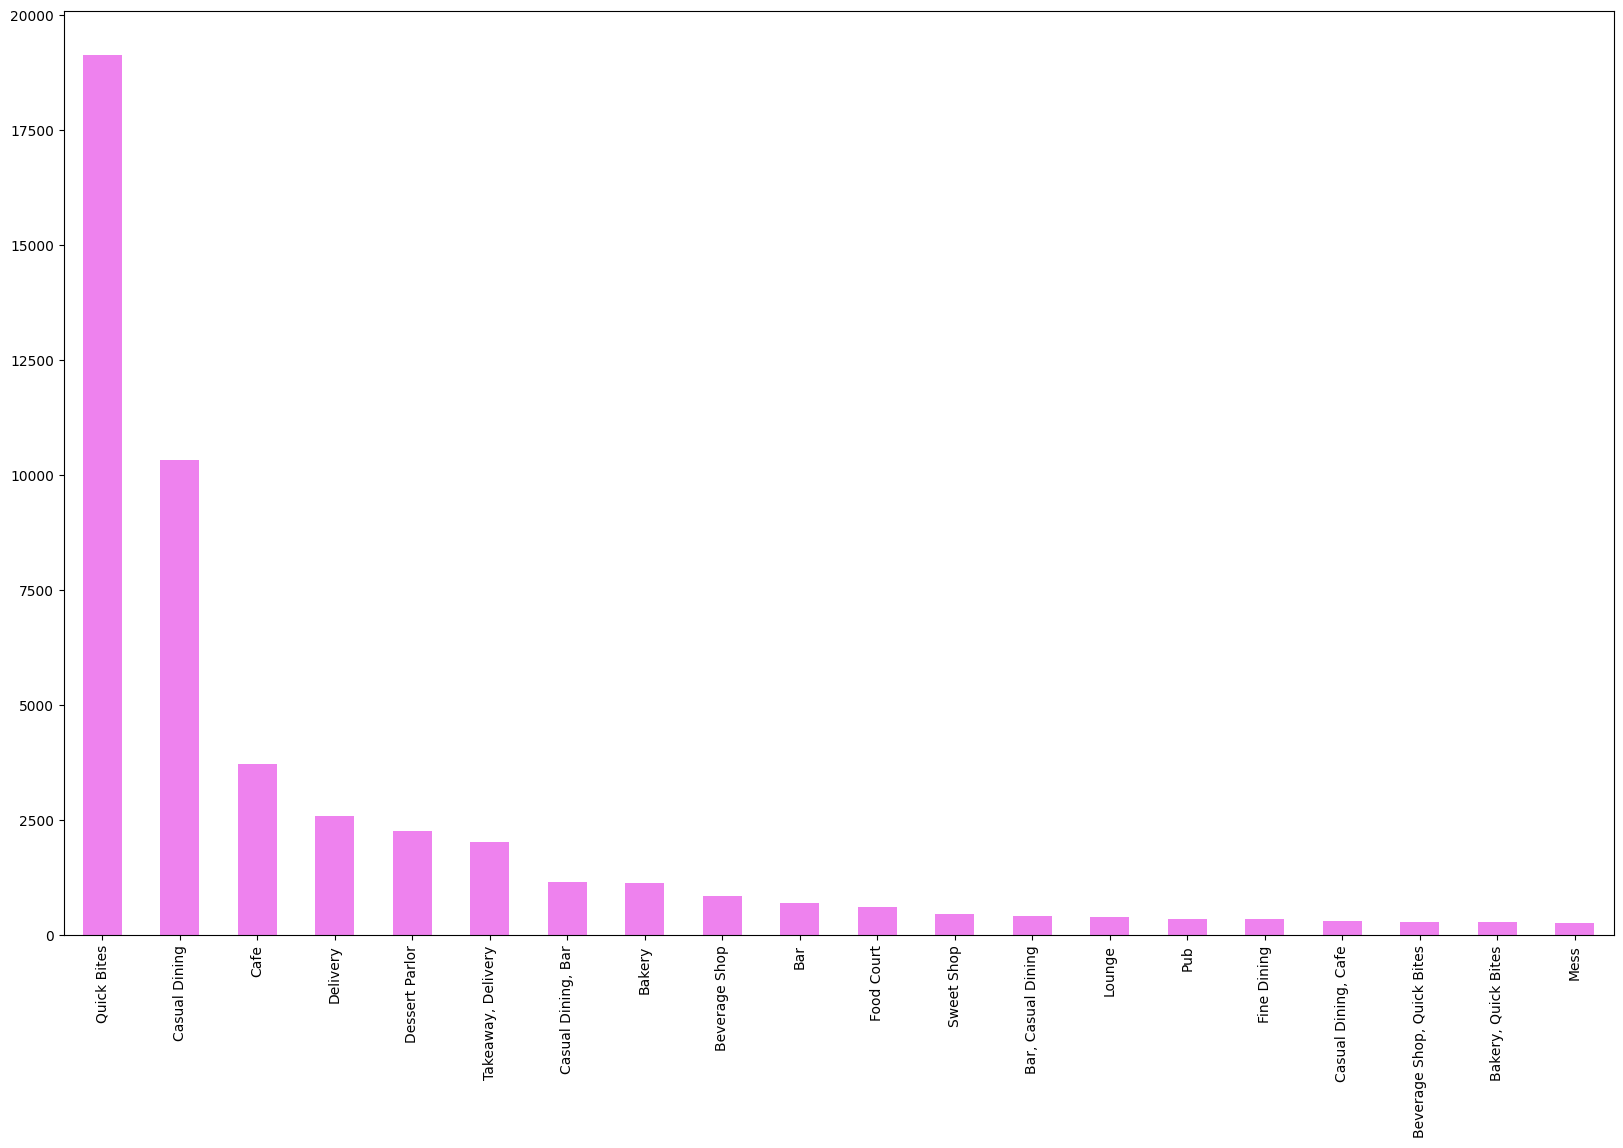

In [42]:
# Plot data
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='violet')

In [43]:
def mark(x):
    if x in ('Quick Bites', 'Casual Dining'):
        return 'Quick Bites+ Casual Dining'
    else:
        return 'others'

In [44]:
df['Top_types']=df['rest_type'].apply(mark)

In [45]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  
0          Buffet    Banashankari  Quick Bites+ Casual Dining  
1          Buffet    Banashankari  Quick Bites+ Casual Dining  
2          Buffet    Banashankari                      others  
3          Buffet    Banashankari  Quick Bites+ Casual Dining  
4          Buffet    Banashankari  Quick Bites+ Casual Dining

##### Installing and importing plotly lib

In [46]:
# !pip install plotly

In [47]:
import plotly.express as px

In [48]:
values = df['Top_types'].value_counts().values

In [49]:
labels = df['Top_types'].value_counts().index
print(labels)

Index(['Quick Bites+ Casual Dining', 'others'], dtype='object')


In [50]:
# Pie chart
fig = px.pie(df, names=labels, values=values)
fig.show()

### Create a new dataframe containing votes, cost & rating for each restaurant

In [51]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [52]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

In [53]:
# reset_index -> convert in dataframe
rest = df.groupby('name').agg({'votes':'sum', 'url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()
rest

name  votes  url  \
0                                     #FeelTheROLL     14    2   
1                                       #L-81 Cafe    432    9   
2                                    #Vibes Restro      0    3   
3                                          #refuel    111    3   
4                           'Brahmins' Thatte Idli      0    1   
...                                            ...    ...  ...   
8787                                       late100      0    5   
8788                                       nu.tree   1443    8   
8789  re:cess - Hilton Bangalore Embassy GolfLinks    438    3   
8790                                    repEAT Hub      0    2   
8791                                     sCoolMeal      0    5   

      approx_cost(for two people)      rate  
0                           200.0  3.400000  
1                           400.0  3.900000  
2                           700.0       NaN  
3                           400.0  3.700000  
4                           100.0       NaN  
...                           ...       ...  
8787                        200.0       NaN  
8788                        400.0  4.314286  
8789                       1200.0  4.100000  
8790                        200.0       NaN  
8791                        300.0       NaN  

[8792 rows x 5 columns]

In [54]:
rest.columns = ['name','total_votes','total_unities','avg_approx_cost','mean_rating']
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  
0          3.4  
1          3.9  
2          NaN  
3          3.7  
4          NaN

In [55]:
rest['votes_per_unity']=rest['total_votes']/rest['total_unities']
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  votes_per_unity  
0          3.4              7.0  
1          3.9             48.0  
2          NaN              0.0  
3          3.7             37.0  
4          NaN              0.0

In [56]:
popular = rest.sort_values(by='total_unities', ascending=False)
popular

name  total_votes  total_unities  \
1320                   Cafe Coffee Day         3089             96   
5549                            Onesta       347520             85   
3788                         Just Bake         2898             73   
2446                 Empire Restaurant       229808             71   
2577                 Five Star Chicken         3134             70   
...                                ...          ...            ...   
1900                        Cool Break           11              1   
8076       The Shake Factory Originals            8              1   
5216        Nethravathi Military Hotel            0              1   
7426  Swadisht North Indian Restaurant           23              1   
5375                Night Punjabi Folk            0              1   

      avg_approx_cost  mean_rating  votes_per_unity  
1320       844.791667     3.147191        32.177083  
5549       600.000000     4.410588      4088.470588  
3788       400.000000     3.355882        39.698630  
2446       685.211268     3.916901      3236.732394  
2577       257.857143     3.425000        44.771429  
...               ...          ...              ...  
1900       150.000000     3.400000        11.000000  
8076       200.000000     3.300000         8.000000  
5216       200.000000          NaN         0.000000  
7426       200.000000     3.200000        23.000000  
5375       200.000000          NaN         0.000000  

[8792 rows x 6 columns]

In [57]:
popular.shape

(8792, 6)

In [58]:
# Number of unique restaurants
popular['name'].nunique()

8792

### Restaurant overview analysis

In [59]:
# Avg votes recieved by rest
# Top 5 most voted rest
# Top 5 less voted rest

In [60]:
import seaborn as sns

In [61]:
popular.sort_values(by='total_votes', ascending=False).query('total_votes > 0').head(5)

name  total_votes  total_unities  avg_approx_cost  \
5549             Onesta       347520             85       600.000000   
8269           Truffles       301059             43       900.000000   
2446  Empire Restaurant       229808             71       685.211268   
3054           Hammered       180602             47      1272.340426   
7751    The Black Pearl       172122             18      1427.777778   

      mean_rating  votes_per_unity  
5549     4.410588      4088.470588  
8269     4.595349      7001.372093  
2446     3.916901      3236.732394  
3054     4.329787      3842.595745  
7751     4.727778      9562.333333

Text(0.5, 1.0, 'Top 5 Less Voted Restaurants\n(with at least 1 vote)')

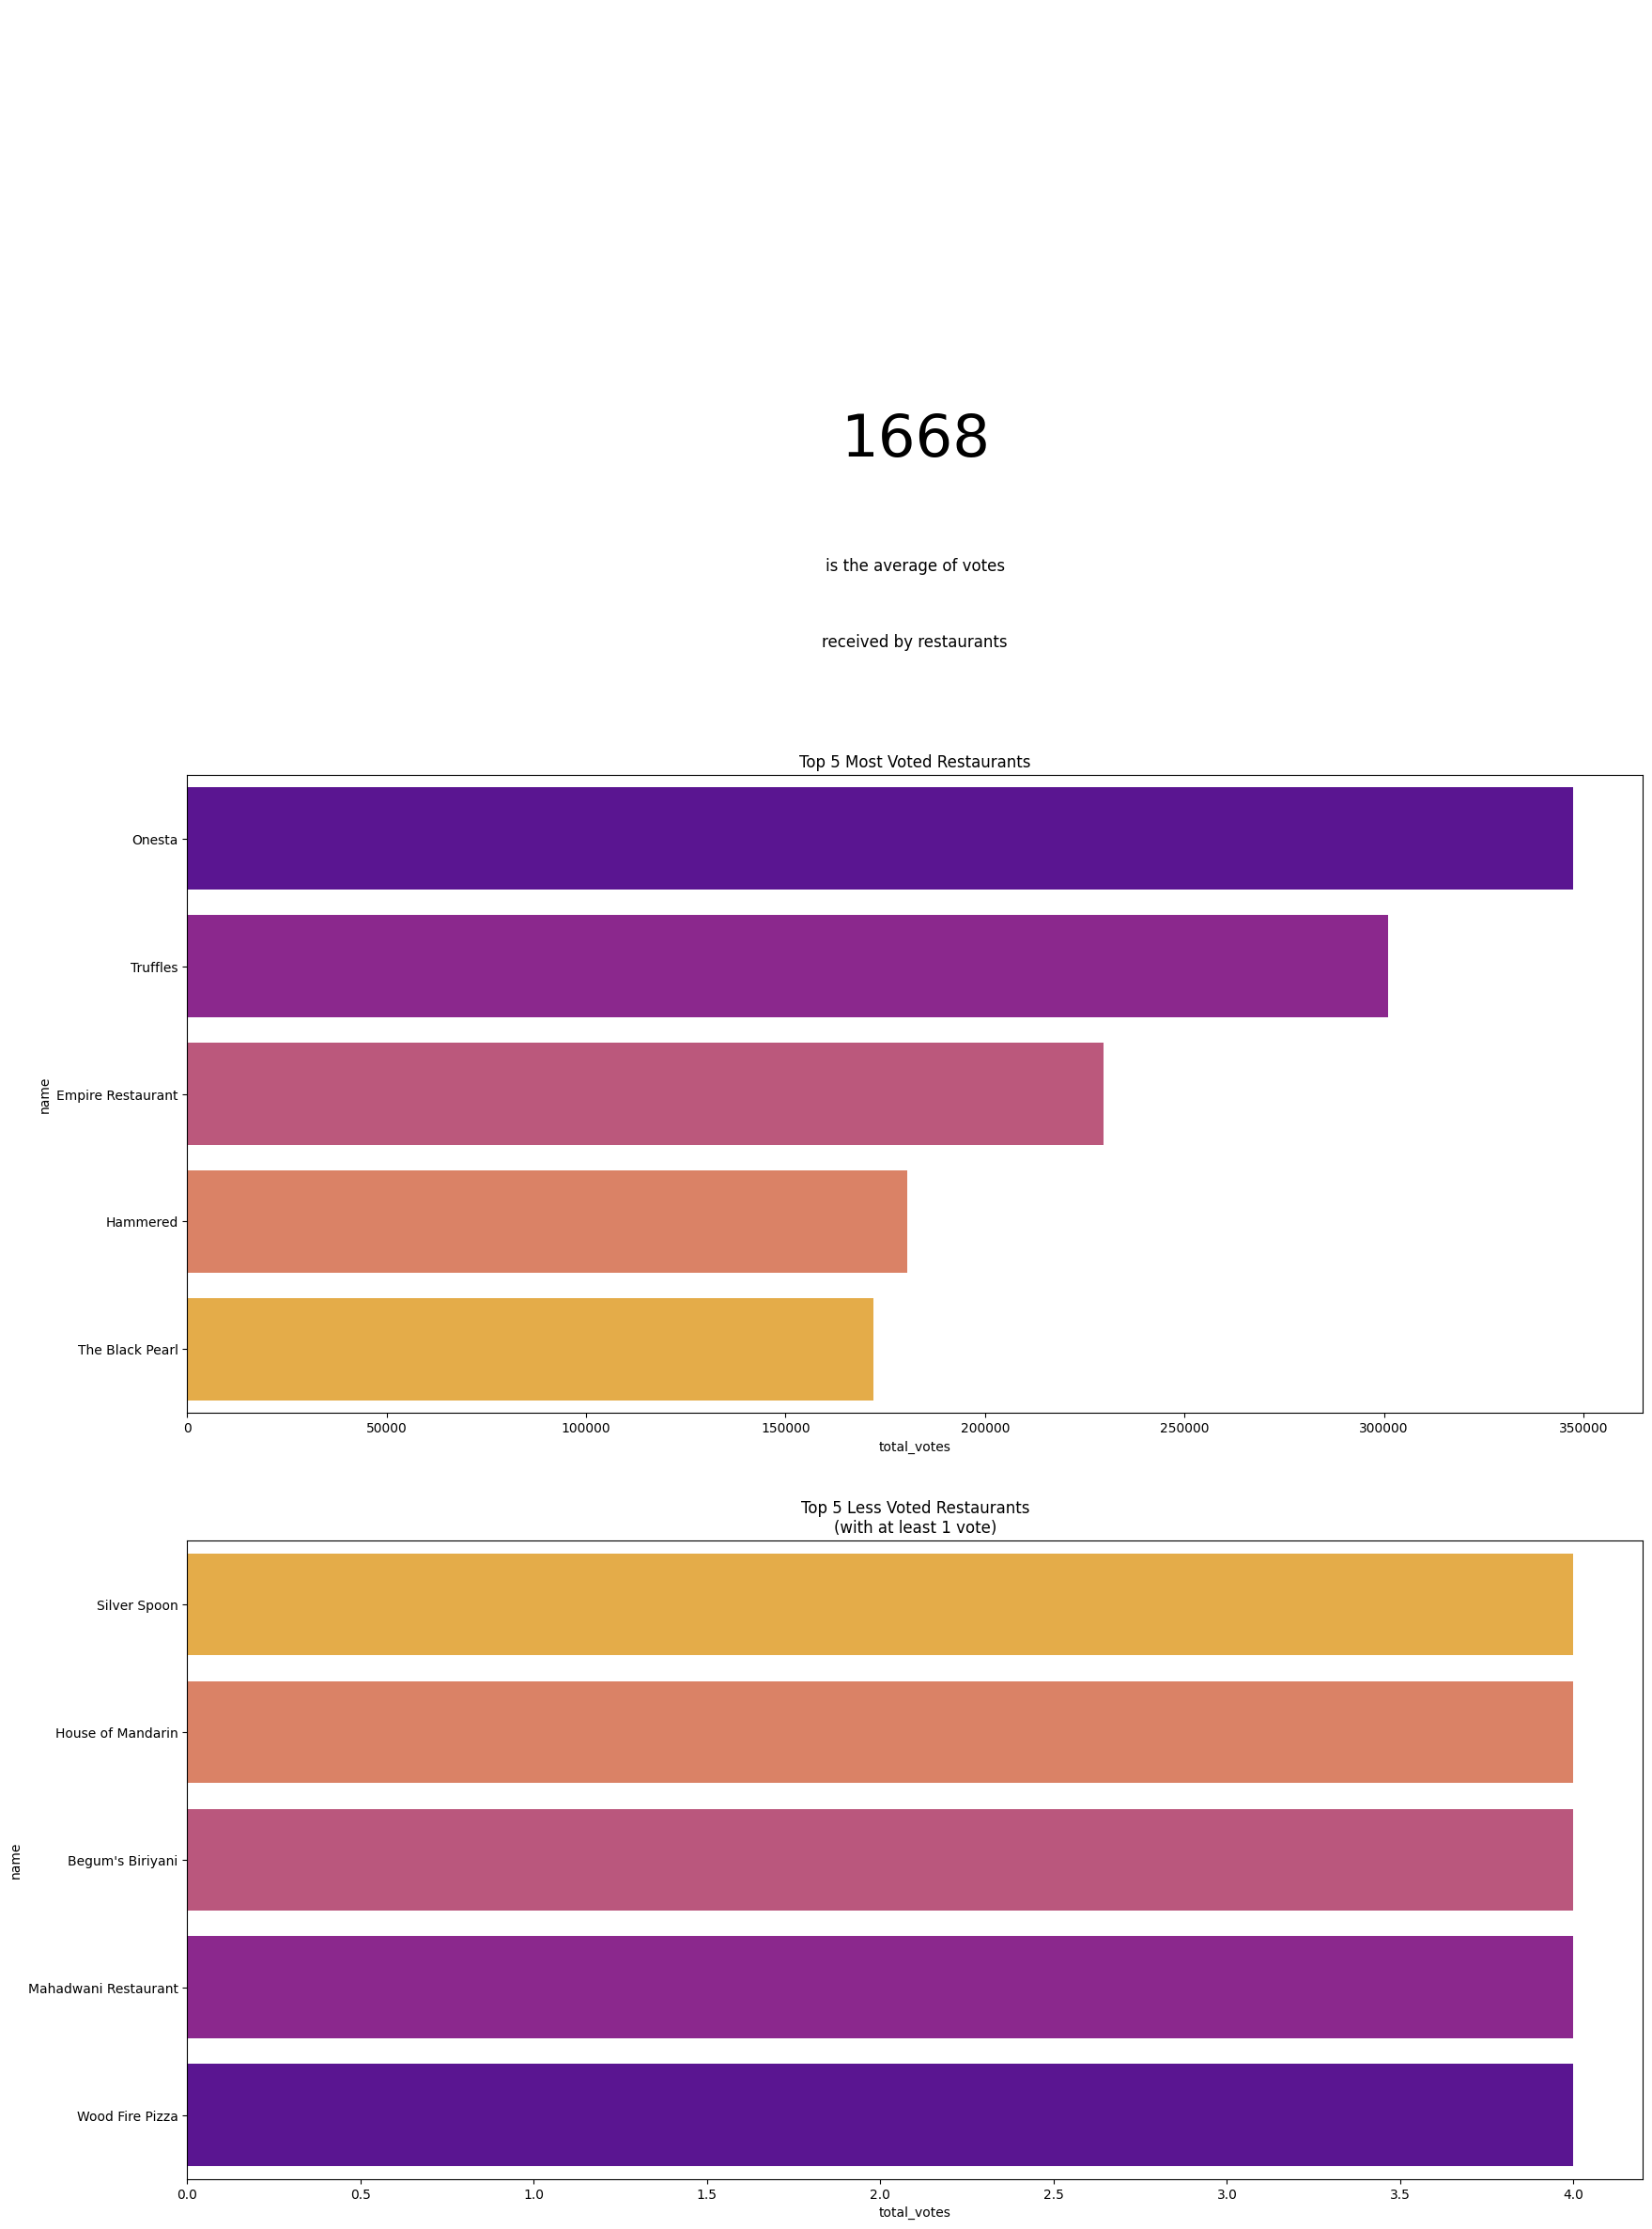

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(20,30)) # get 3 plots
ax1.text(0.50, 0.30, int(popular['total_votes'].mean()), fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is the average of votes', fontsize=12, ha='center')
ax1.text(0.50, 0.00, 'received by restaurants', fontsize=12, ha='center')
ax1.axis('off')

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=False).query('total_votes > 0').head(5), ax=ax2, palette='plasma' )
ax2.set_title('Top 5 Most Voted Restaurants', size=12)

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=False).query('total_votes > 0').tail(5), ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Less Voted Restaurants\n(with at least 1 vote)', size=12)


### Analyze most expensive & cheapest restaurants

Text(0.5, 1.0, 'Top 5 Cheapest Restaurants')

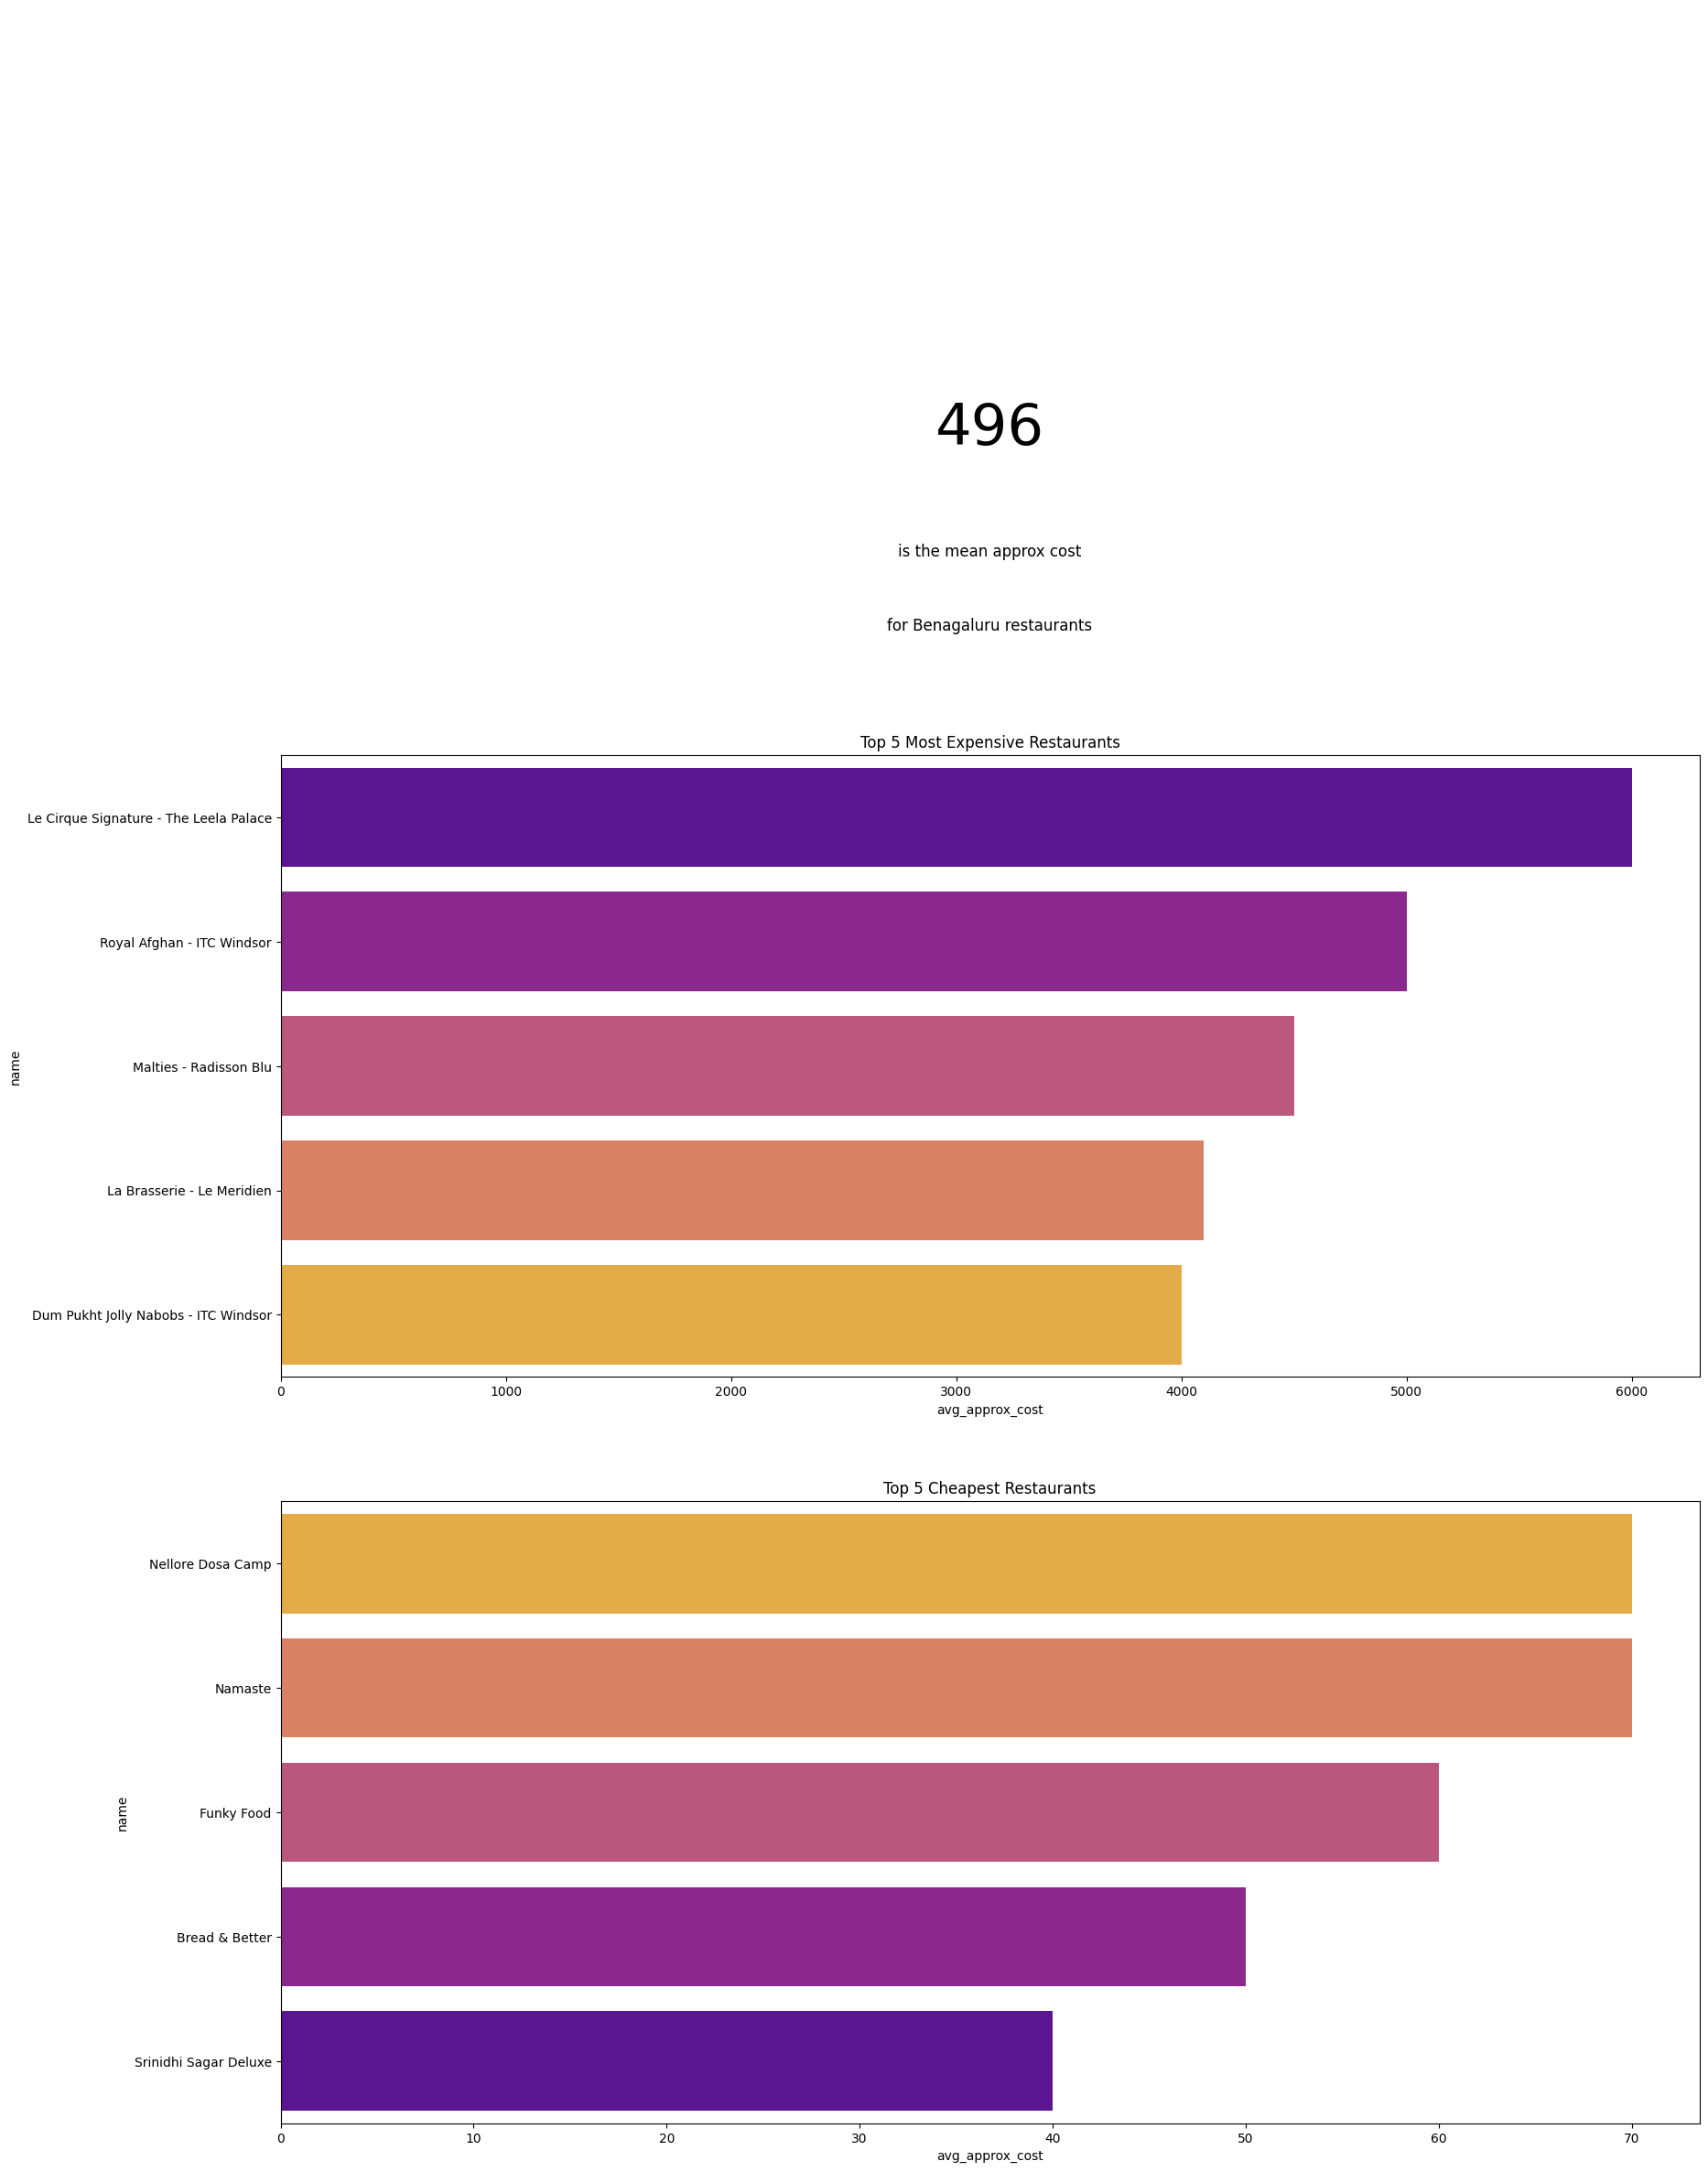

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(20,30)) # get 3 plots
ax1.text(0.50, 0.30, int(popular['avg_approx_cost'].mean()), fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is the mean approx cost', fontsize=12, ha='center')
ax1.text(0.50, 0.00, 'for Benagaluru restaurants', fontsize=12, ha='center')
ax1.axis('off')

sns.barplot(x='avg_approx_cost', y='name', data=popular.sort_values(by='avg_approx_cost', ascending=False).query('avg_approx_cost > 0').head(5), ax=ax2, palette='plasma' )
ax2.set_title('Top 5 Most Expensive Restaurants', size=12)

sns.barplot(x='avg_approx_cost', y='name', data=popular.sort_values(by='avg_approx_cost', ascending=False).query('avg_approx_cost > 0').tail(5), ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Cheapest Restaurants', size=12)


### How many restaurants offer Book Table service? , how about Online Order Service?

In [64]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [65]:
x=df['book_table'].value_counts()
labels = ['not booking', 'booking']

In [66]:
trace = go.Pie(labels=labels, values=x, hoverinfo='label+percent',  textinfo='percent')
iplot([trace])

In [67]:
x=df['online_order'].value_counts()
labels = ['accepted', 'not accepted']

In [68]:
fig=px.pie(df, values=x, names=labels, title='Pie Chart')
fig.show()

### Finding Best Budget Restaurants in any location 

In [69]:
filter = (df['approx_cost(for two people)']<=400) & (df['location']=='BTM') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')
budget = df[filter]
budget.head()


url  \
928  https://www.zomato.com/bangalore/hiyar-majhe-k...   
934  https://www.zomato.com/bangalore/swadista-aaha...   
940  https://www.zomato.com/bangalore/swad-punjab-d...   
942  https://www.zomato.com/bangalore/roti-wala-btm...   
954  https://www.zomato.com/bangalore/litti-twist-b...   

                                               address                 name  \
928  57/1, Near Alliance University, 19th Cross, 7t...  Hiyar Majhe Kolkata   
934     947, 16th Main Road, 2nd Stage, BTM, Bangalore       Swadista Aahar   
940  324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...       Swad Punjab Da   
942  688, 7th Main, 10th Cross Main Road, 2nd Stage...            Roti Wala   
954  No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...          Litti Twist   

    online_order book_table  rate  votes                               phone  \
928          Yes         No   4.0    244  +91 9108919806\r\r\n+91 9739059571   
934          Yes         No   4.1    775  +91 9844006825\r\r\n+91 9844615361   
940          Yes         No   4.0    126                      +91 8360151853   
942          Yes         No   4.0    197                      +91 9731100002   
954          Yes         No   4.1    464                      +91 8884270523   

    location    rest_type                                         dish_liked  \
928      BTM  Quick Bites  Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...   
934      BTM  Quick Bites  Panneer Butter Masala, Idli, Masala Dosa, Vada...   
940      BTM  Quick Bites    Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry   
942      BTM  Quick Bites  Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...   
954      BTM  Quick Bites  Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...   

                                             cuisines  \
928                             Bengali, North Indian   
934  South Indian, North Indian, Chinese, Street Food   
940                                      North Indian   
942                                      North Indian   
954                              North Indian, Bihari   

     approx_cost(for two people)  \
928                        400.0   
934                        300.0   
940                        150.0   
942                        300.0   
954                        300.0   

                                          reviews_list  \
928  [('Rated 4.0', 'RATED\n  I like this restauran...   
934  [('Rated 3.0', "RATED\n  Ordered south Indian ...   
940  [('Rated 4.0', 'RATED\n  If you can visit and ...   
942  [('Rated 5.0', 'RATED\n  Well, I never had a c...   
954  [('Rated 4.0', "RATED\n  It's a great outlet t...   

                                             menu_item listed_in(type)  \
928                                                 []        Delivery   
934                                                 []        Delivery   
940  ['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...        Delivery   
942                                                 []        Delivery   
954                                                 []        Delivery   

       listed_in(city)                   Top_types  
928  Bannerghatta Road  Quick Bites+ Casual Dining  
934  Bannerghatta Road  Quick Bites+ Casual Dining  
940  Bannerghatta Road  Quick Bites+ Casual Dining  
942  Bannerghatta Road  Quick Bites+ Casual Dining  
954  Bannerghatta Road  Quick Bites+ Casual Dining

In [70]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [71]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [72]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

### How to extract latitudes & longitudes for any place 

##### Lat, Lon

In [73]:
# !pip install geopy

In [74]:
from geopy.geocoders import Nominatim

In [75]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  
0          Buffet    Banashankari  Quick Bites+ Casual Dining  
1          Buffet    Banashankari  Quick Bites+ Casual Dining  
2          Buffet    Banashankari                      others  
3          Buffet    Banashankari  Quick Bites+ Casual Dining  
4          Buffet    Banashankari  Quick Bites+ Casual Dining

In [76]:
geolocator = Nominatim(user_agent='app')

In [77]:
data=df['name'][0]
data

'Jalsa'

In [78]:
data = geolocator.geocode(data)

In [79]:
data.latitude

18.5150741

In [80]:
data.longitude

73.82920125

In [81]:
df.shape

(51717, 18)

In [82]:
df['location'].nunique()

93

In [83]:
locations = pd.DataFrame({'Name': df['location'].unique()})
locations

Name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
89      West Bangalore
90         Magadi Road
91           Yelahanka
92      Sahakara Nagar
93              Peenya

[94 rows x 1 columns]

In [84]:
lat=[]
lon=[]

for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:    
        lat.append(location.latitude)
        lon.append(location.longitude)

In [85]:
locations['latitude']=lat
locations['longitude']=lon

In [86]:
locations.head()

Name   latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.946662  77.530090
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

##### Geographical analysis: where exactly most of my rest are situated

In [87]:
# !pip install folium

In [88]:
import folium
from folium.plugins import HeatMap

In [89]:
Rest_locations = df['location'].value_counts().reset_index()

In [90]:
Rest_locations.columns=['Name', 'Count']
Rest_locations

Name  Count
0                     BTM   5124
1                     HSR   2523
2   Koramangala 5th Block   2504
3                JP Nagar   2235
4              Whitefield   2144
..                    ...    ...
88         West Bangalore      6
89              Yelahanka      6
90                 Jakkur      3
91   Rajarajeshwari Nagar      2
92                 Peenya      1

[93 rows x 2 columns]

In [91]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations

Name  Count   latitude   longitude
0                     BTM   5124  45.954851 -112.496595
1                     HSR   2523  18.147500   41.538889
2   Koramangala 5th Block   2504  12.934843   77.618977
3                JP Nagar   2235  12.265594   76.646540
4              Whitefield   2144  53.553368   -2.296902
..                    ...    ...        ...         ...
88         West Bangalore      6  12.984852   77.540063
89              Yelahanka      6  13.100698   77.596345
90                 Jakkur      3  13.078474   77.606894
91   Rajarajeshwari Nagar      2  12.927441   77.515522
92                 Peenya      1  13.032942   77.527325

[92 rows x 4 columns]

In [92]:
basemap = folium.Map(location=[12.97, 77.59])
basemap

In [93]:
# Using a function for HeatMap
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [94]:
basemap = generateBaseMap()
HeatMap(data=Restaurant_locations[['latitude','longitude','Count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [95]:
basemap

### Analysing Customer Behaviour using WordCloud

In [96]:
# !pip install wordcloud

In [97]:
from wordcloud import WordCloud, STOPWORDS #STOPWORDS delete is,are,am

In [98]:
data = df[df['rest_type'] == 'Quick Bites']
data.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                   Top_types  
3     Banashankari  Quick Bites+ Casual Dining  
31    Banashankari  Quick Bites+ Casual Dining  
34    Banashankari  Quick Bites+ Casual Dining  
36    Banashankari  Quick Bites+ Casual Dining  
39    Banashankari  Quick Bites+ Casual Dining

In [99]:
data['dish_liked'][3].split()

['Masala', 'Dosa']

In [100]:
data['dish_liked'].isnull().sum()

13843

In [101]:
dishes = ""
for word in data['dish_liked'].dropna():
    words = word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
    dishes=dishes+' '.join(words)+' '

In [102]:
dishes

'masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, va

In [103]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [104]:
wordcloud = WordCloud(stopwords=stopwords, width=1500, height=1500).generate(dishes)

(-0.5, 1499.5, 1499.5, -0.5)

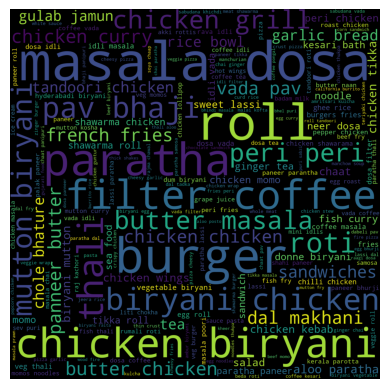

In [105]:
plt.imshow(wordcloud)
plt.axis('off')

### Analysing Reviews of Restaurant

In [106]:
data = df['reviews_list'][0]
data

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [107]:
data = data.lower()

In [108]:
import re

In [109]:
data2 = re.sub('[^a-zA-Z]',' ', data)
data2

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [110]:
data3 = re.sub('rated',' ', data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [111]:
data4 = re.sub('x', ' ', data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [112]:
data5 = re.sub(' +', ' ', data4)
data5

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

In [113]:
dataset = df[df['rest_type']=='Quick Bites']

In [114]:
dataset

url  \
3      https://www.zomato.com/bangalore/addhuri-udupi...   
31     https://www.zomato.com/bangalore/foodiction-1-...   
34     https://www.zomato.com/bangalore/faasos-banash...   
36     https://www.zomato.com/bangalore/fast-and-fres...   
39     https://www.zomato.com/bangalore/maruthi-davan...   
...                                                  ...   
51641  https://www.zomato.com/bangalore/andhra-spices...   
51642  https://www.zomato.com/bangalore/basaveshwara-...   
51643  https://www.zomato.com/bangalore/new-ambur-bir...   
51644  https://www.zomato.com/bangalore/punjabi-thadk...   
51645  https://www.zomato.com/bangalore/raapchick-bro...   

                                                 address  \
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36     32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39     556/A, Water Tank Road, 3rd Stage, Banashankar...   
...                                                  ...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   
51642  Nanjudeshwari complex, Oppsite Brookefield Mal...   
51643  AECS Layout, ITPL Main Road, Brookefield, Bang...   
51644  7/3, ASK Tower, Kundanahalli Gate, Next to Bat...   
51645  Opposite Brookefield Mall, Kundanhalli, Brooke...   

                               name online_order book_table  rate  votes  \
3             Addhuri Udupi Bhojana           No         No   3.7     88   
31                       Foodiction          Yes         No   2.8    506   
34                           Faasos          Yes         No   4.2    415   
36                   Fast And Fresh          Yes         No   2.8     91   
39     Maruthi Davangere Benne Dosa          Yes         No   4.0     17   
...                             ...          ...        ...   ...    ...   
51641                 Andhra Spices           No         No   3.2      4   
51642        Basaveshwara Khanavali           No         No   NaN      0   
51643             New Ambur Biryani           No         No   NaN      0   
51644                Punjabi Thadka           No         No   NaN      0   
51645                     Raapchick          Yes         No   3.6     49   

                                phone      location    rest_type  \
3                      +91 9620009302  Banashankari  Quick Bites   
31                     +91 9916107070  Banashankari  Quick Bites   
34                     +91 7700020020  Banashankari  Quick Bites   
36                     +91 9742974232  Banashankari  Quick Bites   
39                     +91 9019563485  Banashankari  Quick Bites   
...                               ...           ...          ...   
51641                             NaN   Brookefield  Quick Bites   
51642  +91 9740912864\n+91 7353747430   Brookefield  Quick Bites   
51643                  +91 9443087893   Brookefield  Quick Bites   
51644  +91 7338330336\n+91 9591568221   Brookefield  Quick Bites   
51645    080 41717785\n+91 9571153004   Brookefield  Quick Bites   

                                              dish_liked  \
3                                            Masala Dosa   
31     Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                   NaN   
39                                                   NaN   
...                                                  ...   
51641                                                NaN   
51642                                                NaN   
51643                                                NaN   
51644                                                NaN   
51645                                            Burgers   

                                       cuisines  approx_cost(for two people)  \
3                    South Indian, North Indian                        300.0   


In [115]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub(' x ',' ',review)
    review=re.sub(' n ',' ',review)
    review=re.sub(' u ',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)
 

(-0.5, 799.5, 799.5, -0.5)

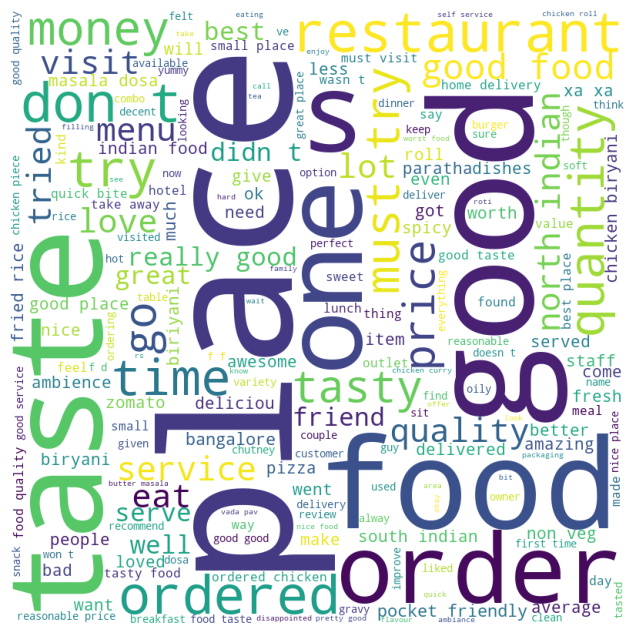

In [116]:
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(total_review) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud2) 
plt.axis("off") 

### Prepare data for the modelling purpose

In [117]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  
0          Buffet    Banashankari  Quick Bites+ Casual Dining  
1          Buffet    Banashankari  Quick Bites+ Casual Dining  
2          Buffet    Banashankari                      others  
3          Buffet    Banashankari  Quick Bites+ Casual Dining  
4          Buffet    Banashankari  Quick Bites+ Casual Dining

In [118]:
# df -- split in 2
# new_rest -- rating 0 (I wan tto predict its rating)
# train_val_rest -- >0 (the dataset use to train the ML moodel)

In [119]:
def assign (x):
    if x>0:
        return 1
    else:
        return 0

In [120]:
df['rated'] = df['rate'].apply(assign)

In [121]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

In [122]:
df['rated'].unique()

array([1, 0])

In [123]:
df['rated'] == 0

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rated, Length: 51717, dtype: bool

In [124]:
# Split the data
new_restaurants = df[df['rated']==0]
train_val_restaurants=df.query('rated==1') #filter

In [125]:
# This is the dataframe use to train the ML model
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  rated  
0          Buffet    Banashankari  Quick Bites+ Casual Dining      1  
1          Buffet    Banashankari  Quick Bites+ Casual Dining      1  
2          Buffet    Banashankari                      others      1  
3          Buffet    Banashankari  Quick Bites+ Casual Dining      1  
4          Buffet    Banashankari  Quick Bites+ Casual Dining      1

In [126]:
train_val_restaurants['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

### Create a target variable - add a feature on the basis of what to predict

In [127]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

In [128]:
# Create target column
# A domain expertise tells us:
# rest<3.75 -- bad category (0), > 3.75 -- good category (1)

In [129]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [130]:
# Using lambda function
threshold = 3.75
train_val_restaurants['target']=train_val_restaurants['rate'].apply(lambda x: 1 if x>=threshold else 0)

In [131]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  rated  target  
0          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1  
2          Buffet    Banashankari                      others      1       1  
3          Buffet    Banashankari  Quick Bites+ Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1

In [132]:
# Using normal function
def target(x):
    if x>threshold:
        return 1
    else:
        return 0

In [133]:
threshold = 3.75
train_val_restaurants['target']=train_val_restaurants['rate'].apply(target)

In [134]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  rated  target  
0          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1  
2          Buffet    Banashankari                      others      1       1  
3          Buffet    Banashankari  Quick Bites+ Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1

In [135]:
# Find if there is imbalance situation with data
x=train_val_restaurants['target'].value_counts()
x

0    21421
1    20244
Name: target, dtype: int64

In [136]:
labels = x.index
labels

Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x14792a620>,
 [Text(-0.04879500100763322, 1.0989172161162393, ''),
  Text(0.05323091019014493, -1.1988187812177156, '')],
 [Text(-0.026615455095072665, 0.5994093906088577, '51.4%'),
  Text(0.031051364277584537, -0.699310955710334, '48.6%')])

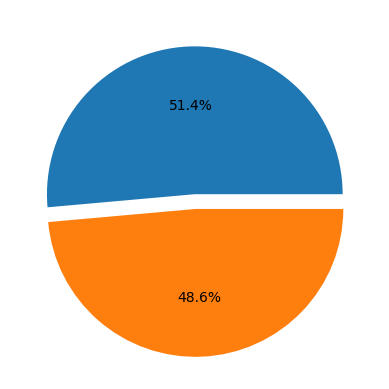

In [137]:
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x144b91120>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')])

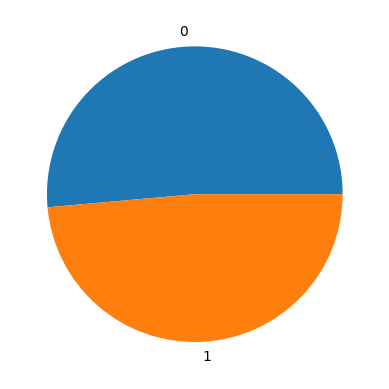

In [138]:
plt.pie(x,labels=labels)
# The ratio is almost 1:1 -> there is not a imbalance situation

### Perform Feature Extraction/Importance on data

In [139]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target'],
      dtype='object')

In [140]:
# Not each a& every column of my data play a major role when creating the ML model

In [141]:
# from n features -- consider k features (k<n)
# domain expertise says which feature is important   

In [142]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  rated  target  
0          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1  
2          Buffet    Banashankari                      others      1       1  
3          Buffet    Banashankari  Quick Bites+ Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1

In [143]:
len(train_val_restaurants['cuisines'][0].split(','))

3

In [144]:
def count(x):
    return len(x.split(','))

In [145]:
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)

In [146]:
train_val_restaurants['multiple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)

In [147]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  ... approx_cost(for two people)  \
0  Banashankari        Casual Dining  ...                       800.0   
1  Banashankari        Casual Dining  ...                       800.0   
2  Banashankari  Cafe, Casual Dining  ...                       800.0   
3  Banashankari          Quick Bites  ...                       300.0   
4  Basavanagudi        Casual Dining  ...                       600.0   

                                        reviews_list  menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...         []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...         []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...         []   
3  [('Rated 4.0', "RATED\n  Great food and proper...         []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...         []   

  listed_in(type) listed_in(city)                   Top_types rated target  \
0          Buffet    Banashankari  Quick Bites+ Casual Dining     1      1   
1          Buffet    Banashankari  Quick Bites+ Casual Dining     1      1   
2          Buffet    Banashankari                      others     1      1   
3          Buffet    Banashankari  Quick Bites+ Casual Dining     1      0   
4          Buffet    Banashankari  Quick Bites+ Casual Dining     1      1   

   total_cuisines  multiple_types  
0               3               1  
1               3               1  
2               3               2  
3               2               1  
4               2               1  

[5 rows x 22 columns]

In [148]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [149]:
imp_features=['online_order','book_table','location','rest_type','multiple_types','total_cuisines','listed_in(type)', 'listed_in(city)','approx_cost(for two people)','target']

In [150]:
data = train_val_restaurants[imp_features]

In [151]:
data.shape

(41665, 10)

In [152]:
# This is the dataframe to consider in the ML model
data.head()

online_order book_table      location            rest_type  multiple_types  \
0          Yes        Yes  Banashankari        Casual Dining               1   
1          Yes         No  Banashankari        Casual Dining               1   
2          Yes         No  Banashankari  Cafe, Casual Dining               2   
3           No         No  Banashankari          Quick Bites               1   
4           No         No  Basavanagudi        Casual Dining               1   

   total_cuisines listed_in(type) listed_in(city)  \
0               3          Buffet    Banashankari   
1               3          Buffet    Banashankari   
2               3          Buffet    Banashankari   
3               2          Buffet    Banashankari   
4               2          Buffet    Banashankari   

   approx_cost(for two people)  target  
0                        800.0       1  
1                        800.0       1  
2                        800.0       1  
3                        300.0       0  
4                        600.0       1

### How to come across with missing values

In [153]:
data.shape

(41665, 10)

In [154]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
multiple_types                   0
total_cuisines                   0
listed_in(type)                  0
listed_in(city)                  0
approx_cost(for two people)    247
target                           0
dtype: int64

In [155]:
# Because there is few null values, that represents less than 10%
# it wouldn't be a problem if I drop these values

In [156]:
data.dropna(how='any',inplace=True) #how=any -> if there is a missing value, remove that value

In [157]:
data.shape

(41271, 10)

### Separate categorical & numerical features

In [158]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
multiple_types                   int64
total_cuisines                   int64
listed_in(type)                 object
listed_in(city)                 object
approx_cost(for two people)    float64
target                           int64
dtype: object

In [159]:
# Using list comprehension
cat_features = [col for col in data.columns if data[col].dtype == 'O'] #'O' stands for object type
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [160]:
# Using normal for-loop
cat_col = []

for col in data.columns:
    if data[col].dtype=='O':
        cat_col.append(col)
cat_col

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [161]:
num_features = [col for col in data.columns if data[col].dtype != 'O']
num_features

['multiple_types', 'total_cuisines', 'approx_cost(for two people)', 'target']

In [162]:
for feature in cat_features:
   print('{} has total {} unique features '.format(feature, data[feature].nunique()))

online_order has total 2 unique features 
book_table has total 2 unique features 
location has total 92 unique features 
rest_type has total 87 unique features 
listed_in(type) has total 7 unique features 
listed_in(city) has total 30 unique features 


### Feature encoding on data - reduce # of categories

In [163]:
data[cat_features].head()

online_order book_table      location            rest_type listed_in(type)  \
0          Yes        Yes  Banashankari        Casual Dining          Buffet   
1          Yes         No  Banashankari        Casual Dining          Buffet   
2          Yes         No  Banashankari  Cafe, Casual Dining          Buffet   
3           No         No  Banashankari          Quick Bites          Buffet   
4           No         No  Basavanagudi        Casual Dining          Buffet   

  listed_in(city)  
0    Banashankari  
1    Banashankari  
2    Banashankari  
3    Banashankari  
4    Banashankari

In [164]:
# feature encoding -- ML understand maths
# convert string -- numbers using Feature encoding technique
# Techniques:
# - one hot encoding (if the feature has 5, 10 categories -> this could work)
# 

In [165]:
# one hot encoding:
# assign 1 - Yes, 0 - No
# it creates one column for No & Yes
# if I have 92 unique features, it will create 92 new columns (NOT RIGHT - much and much data) -> model becomes complex

In [166]:
data['location'].nunique()

92

In [167]:
# Look for contribution of every location
values = (data['location'].value_counts()/len(data))*100
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

In [168]:
# When having such little contribution for a category
# I can consider those categories in other category
# in this way, I can apply one hot encoding

In [169]:
threshold = 0.4

# Have location which contribution is greater than 0.4
imp=values[values>threshold]
imp

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [170]:
imp.index

Index(['BTM', 'Koramangala 5th Block', 'HSR', 'Indiranagar', 'JP Nagar',
       'Jayanagar', 'Whitefield', 'Marathahalli', 'Bannerghatta Road',
       'Koramangala 7th Block', 'Koramangala 6th Block', 'Brigade Road',
       'Bellandur', 'Sarjapur Road', 'Koramangala 1st Block', 'Ulsoor',
       'Koramangala 4th Block', 'Electronic City', 'MG Road', 'Banashankari',
       'Kalyan Nagar', 'Malleshwaram', 'Residency Road', 'Richmond Road',
       'Basavanagudi', 'Frazer Town', 'Church Street', 'Brookefield',
       'New BEL Road', 'Kammanahalli', 'Lavelle Road', 'Cunningham Road',
       'Banaswadi', 'Rajajinagar', 'Domlur', 'Shanti Nagar',
       'Old Airport Road', 'St. Marks Road', 'Shivajinagar',
       'Commercial Street', 'Ejipura', 'Jeevan Bhima Nagar', 'Vasanth Nagar',
       'Koramangala 8th Block', 'Koramangala 3rd Block', 'Wilson Garden'],
      dtype='object')

In [171]:
imp.nunique()

45

In [172]:
data['location'].nunique()

92

In [173]:
# Thus, 47 categories would be considered in other new category

In [174]:
data['location']=np.where(data['location'].isin(imp.index), data['location'], 'other')

In [175]:
data['location'].nunique()
# Now I just have 47 categories instead of 92 categories

47

In [176]:
# Lambda function
# data['location']=data['location'].apply(lambda x:'other' if x not in imp.index else x)

In [177]:
# Remove a column in a dataframe
# data.drop(columns=['loca'])

In [178]:
data.head()

online_order book_table      location            rest_type  multiple_types  \
0          Yes        Yes  Banashankari        Casual Dining               1   
1          Yes         No  Banashankari        Casual Dining               1   
2          Yes         No  Banashankari  Cafe, Casual Dining               2   
3           No         No  Banashankari          Quick Bites               1   
4           No         No  Basavanagudi        Casual Dining               1   

   total_cuisines listed_in(type) listed_in(city)  \
0               3          Buffet    Banashankari   
1               3          Buffet    Banashankari   
2               3          Buffet    Banashankari   
3               2          Buffet    Banashankari   
4               2          Buffet    Banashankari   

   approx_cost(for two people)  target  
0                        800.0       1  
1                        800.0       1  
2                        800.0       1  
3                        300.0       0  
4                        600.0       1

In [179]:
values2 = (data['rest_type'].value_counts()/len(data))*100
values2

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [180]:
threshold = 1.5
imp2 = values2[values2 > threshold]
imp2

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [181]:
# We have eliminated 77 categories
len(imp2)

10

In [182]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index), data['rest_type'], 'other')

In [183]:
data['rest_type'].head(20)

0     Casual Dining
1     Casual Dining
2             other
3       Quick Bites
4     Casual Dining
5     Casual Dining
6     Casual Dining
7             other
8              Cafe
9              Cafe
10             Cafe
11             Cafe
12             Cafe
13             Cafe
14            other
15             Cafe
16             Cafe
17             Cafe
18             Cafe
19             Cafe
Name: rest_type, dtype: object

#### After applying feature reduction, we will observe less number of features

In [184]:
for feature in cat_features:
   print('{} has total {} unique features '.format(feature, data[feature].nunique()))

online_order has total 2 unique features 
book_table has total 2 unique features 
location has total 47 unique features 
rest_type has total 11 unique features 
listed_in(type) has total 7 unique features 
listed_in(city) has total 30 unique features 


In [185]:
# Apply ont hot encoding

In [186]:
data_cat = data[cat_features]
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [187]:
data_cat.head()

online_order book_table      location      rest_type listed_in(type)  \
0          Yes        Yes  Banashankari  Casual Dining          Buffet   
1          Yes         No  Banashankari  Casual Dining          Buffet   
2          Yes         No  Banashankari          other          Buffet   
3           No         No  Banashankari    Quick Bites          Buffet   
4           No         No  Basavanagudi  Casual Dining          Buffet   

  listed_in(city)  
0    Banashankari  
1    Banashankari  
2    Banashankari  
3    Banashankari  
4    Banashankari

In [188]:
# One hot encoding

for col in cat_features:
    col_encoded = pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    # get_dummies -> Convert categorical variable into dummy/indicator variables
    # drop_first -> remove the default feature category
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    # Remove the each categorical col, after creating the encoded new col
    data_cat.drop(col, axis=1, inplace=True)

In [189]:
# Before I had 6 columns, now there are 93 columns
data_cat.shape

(41271, 93)

In [190]:
data_cat.head()

online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  \
0                   0                           0                      0   
1                   0                           0                      0   
2                   0                           0                      0   
3                   0                           0                      0   
4                   0                           0                      1   

   location_Bellandur  location_Brigade Road  location_Brookefield  \
0                   0                      0                     0   
1                   0                      0                     0   
2                   0                      0                     0   
3                   0                      0                     0   
4                   0                      0                     0   

   location_Church Street  ...  listed_in(city)_Lavelle Road  \
0                       0  ...                             0   
1                       0  ...                             0   
2                       0  ...                             0   
3                       0  ...                             0   
4                       0  ...                             0   

   listed_in(city)_MG Road  listed_in(city)_Malleshwaram  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   listed_in(city)_Marathahalli  listed_in(city)_New BEL Road  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   listed_in(city)_Old Airport Road  listed_in(city)_Rajajinagar  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   listed_in(city)_Residency Road  listed_in(city)_Sarjapur Road  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   listed_in(city)_Whitefield  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 93 columns]

### Prepare the entire data for the ML model

In [191]:
data.columns

Index(['online_order', 'book_table', 'location', 'rest_type', 'multiple_types',
       'total_cuisines', 'listed_in(type)', 'listed_in(city)',
       'approx_cost(for two people)', 'target'],
      dtype='object')

In [192]:
num_features

['multiple_types', 'total_cuisines', 'approx_cost(for two people)', 'target']

In [193]:
# Concatenate categorical datafram with numerical one
data_final = pd.concat([data.loc[:,['multiple_types', 'total_cuisines', 'approx_cost(for two people)', 'target']], data_cat], axis=1) #axis=1 , to perform the operation in vertical way

In [194]:
data_final

multiple_types  total_cuisines  approx_cost(for two people)  target  \
0                   1               3                        800.0       1   
1                   1               3                        800.0       1   
2                   2               3                        800.0       1   
3                   1               2                        300.0       0   
4                   1               2                        600.0       1   
...               ...             ...                          ...     ...   
51709               2               2                        800.0       0   
51711               2               4                        800.0       0   
51712               1               1                       1500.0       0   
51715               1               1                       2500.0       1   
51716               2               3                       1500.0       0   

       online_order_Yes  book_table_Yes  location_Banashankari  \
0                     1               1                      1   
1                     1               0                      1   
2                     1               0                      1   
3                     0               0                      1   
4                     0               0                      0   
...                 ...             ...                    ...   
51709                 0               0                      0   
51711                 0               0                      0   
51712                 0               0                      0   
51715                 0               1                      0   
51716                 0               0                      0   

       location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  \
0                       0                           0                      0   
1                       0                           0                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      1   
...                   ...                         ...                    ...   
51709                   0                           0                      0   
51711                   0                           0                      0   
51712                   0                           0                      0   
51715                   0                           0                      0   
51716                   0                           0                      0   

       ...  listed_in(city)_Lavelle Road  listed_in(city)_MG Road  \
0      ...                             0                        0   
1      ...                             0                        0   
2      ...                             0                        0   
3      ...                             0                        0   
4      ...                             0                        0   
...    ...                           ...                      ...   
51709  ...                             0                        0   
51711  ...                             0                        0   
51712  ...                             0                        0   
51715  ...                             0                        0   
51716  ...                             0                        0   

       listed_in(city)_Malleshwaram  listed_in(city)_Marathahalli  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   
...                             ...                           ...   
5170

##### Getting the independent feature

In [195]:
# Delete target column, is the one I will predict
# Independent fata
X = data_final.drop('target', axis=1)

# Depedent data
y = data_final['target']

##### Testing and Training on data

In [196]:
# Train -> ML model learn some with of relations/patterns of the data
# Testing -> do predictions

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
data_final.shape

(41271, 97)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [200]:
# I have only 33k data points, which is 80% of the total dataset
X_train.shape

(33016, 96)

### Apply Random Forest on data

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
# n_estimators -> # of dTs
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)

In [203]:
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=1)

In [204]:
# Make predictions.
predictions = model.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 0, 0])

In [205]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [206]:
# y_test is the actual data 

In [207]:
confusion_matrix(predictions, y_test)
# [[Right Wrong], [Wrong Right]]
# [[TP FP], [FN TN]]

array([[3556, 1283],
       [ 696, 2720]])

In [208]:
accuracy_score(predictions, y_test)

0.7602665051483949

### Playing with multiple algorithms & checking its accuracy

In [209]:
# !pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.9 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [210]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [211]:
models=[]
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decisio Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [216]:
for name, model in models:
    print(name)
    print(model)
    model.fit(X_train, y_train)
    
    # Make Predictions
    predictions = model.predict(X_test)
    
    # Compute error
    cm = confusion_matrix(predictions, y_test)
    print(cm)
    
    acc = accuracy_score(predictions, y_test)
    print(acc)
    print('\n')


LogisticRegression
LogisticRegression()
[[3468 1519]
 [ 784 2484]]
0.7210175651120533


Naive Bayes
GaussianNB()
[[3040 1460]
 [1212 2543]]
0.6763173834039976


RandomForest
RandomForestClassifier()
[[3499  953]
 [ 753 3050]]
0.7933373712901272


Decisio Tree
DecisionTreeClassifier()
[[3648  821]
 [ 604 3182]]
0.8273773470623864


KNN
KNeighborsClassifier()
[[3609  997]
 [ 643 3006]]
0.8013325257419746




### Remove file downloaded in the path after finishing with the project

In [8]:
os.remove(data_path)